# C1 - Introduction to Human and Computer Vision
## Week 2 - Draft Notebook

In [1]:
import os
import re
import matplotlib.pyplot as plt

# Get project's root directory
BASE_PATH = os.path.join(re.search(r'.+(Team5)', os.getcwd())[0], 'week2')
os.chdir(BASE_PATH)
BASE_PATH

'c:\\Users\\Usuario\\Documents\\Màster\\C1\\Team5\\week2'

### Load datasets

In [5]:
from src.image_dataset import ImageDataset, ColorSpace
import platform

if platform.system() == 'Windows':
    DATA_DIRECTORY = '../data'
else:
    DATA_DIRECTORY = './data'

# Load the Cropped Dataset (QueryDataset) and Background Dataset (BGDataset)
QueryDataset = ImageDataset(f'{DATA_DIRECTORY}/qsd1_w1', colorspace=ColorSpace.RGB, interval=10)
BGDataset = ImageDataset(f'{DATA_DIRECTORY}/qsd2_w2', colorspace=ColorSpace.RGB, interval=10)

### Task 1 - Block and hierarchical histograms

In [236]:
import importlib
import src.image

# Reload after making changes
importlib.reload(src.image) 
from src.image import Image

### Task 2 - Evaluate retrieval results

### Task 3 - Background removal

#### Plot Original / Groundtruth / Obtained Mask

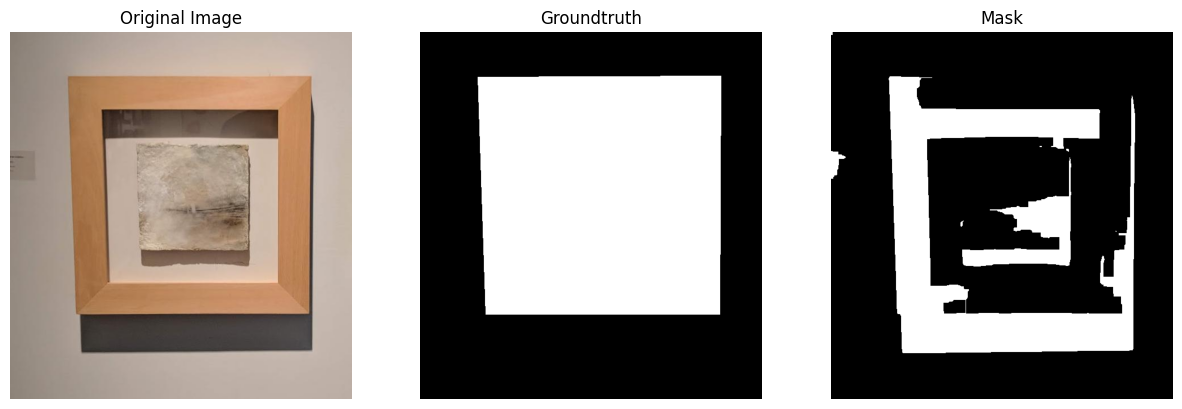

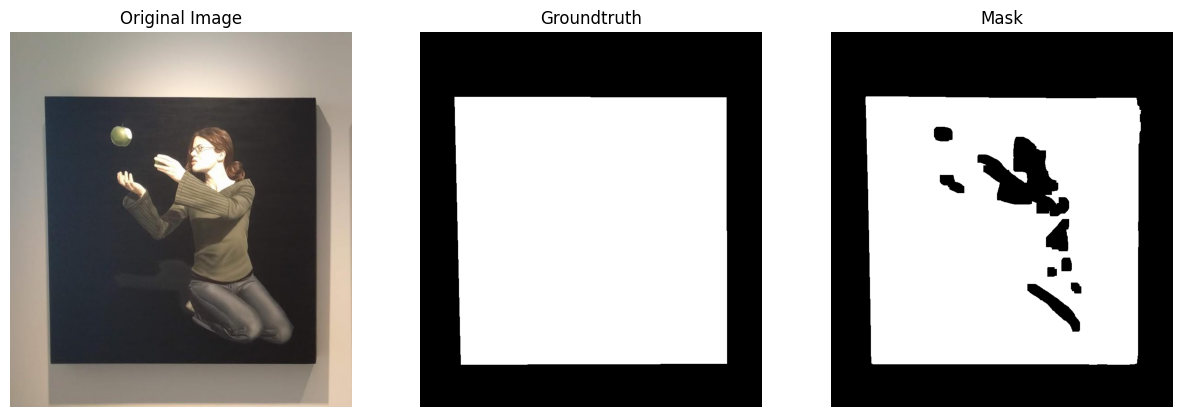

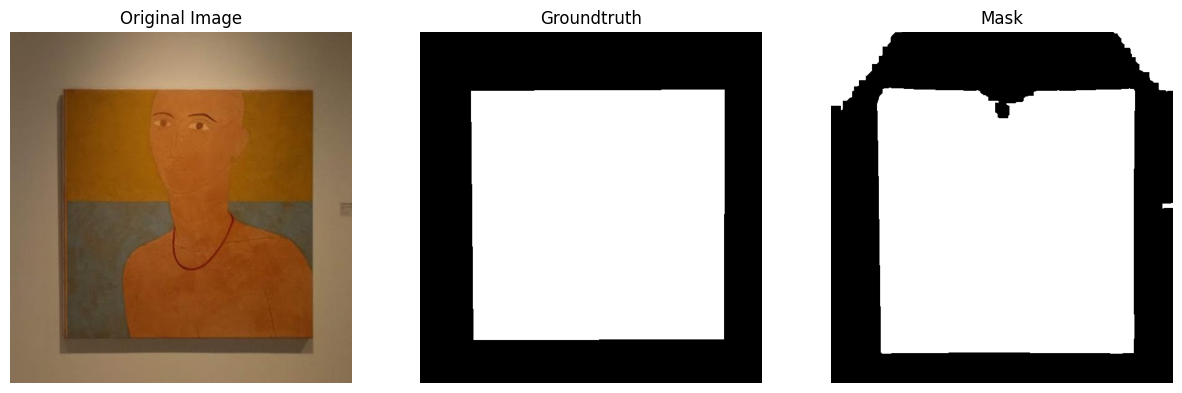

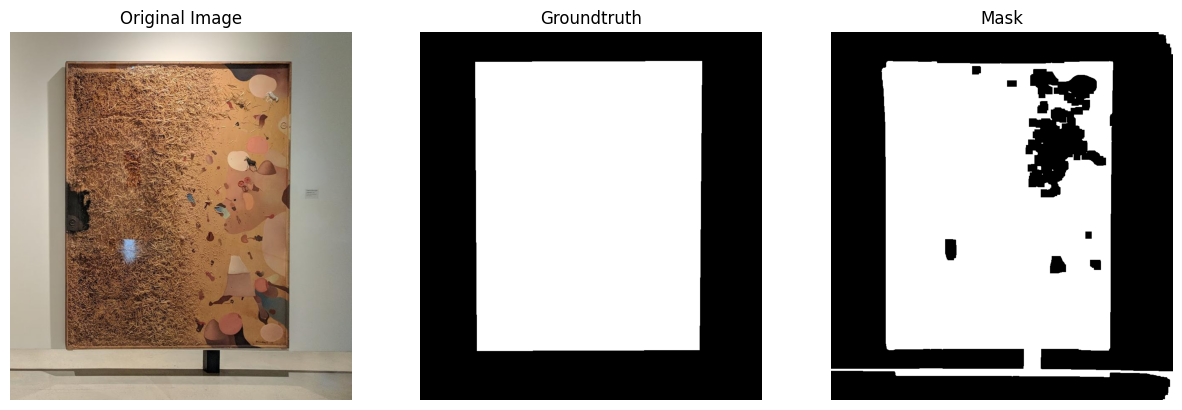

In [100]:
import importlib
import cv2
import src.background_removal

# Reload after making changes
importlib.reload(src.background_removal) 
from src.background_removal import get_mask_and_foreground

background_files = [f for f in os.listdir(f'{DATA_DIRECTORY}/qsd2_w2') if f.endswith('.png')]

# Loop will need to be changed to len(background_files) --> for i in range(0, len(background_files))
for i in range(0, 4):
    image = cv2.cvtColor(BGDataset.images[i].original_image, cv2.COLOR_BGR2RGB)

    # Original Image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    # Groundtruth
    ground_truth = os.path.join(f'{DATA_DIRECTORY}/qsd2_w2', background_files[i])
    ground_truth = cv2.imread(ground_truth)
    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth)
    plt.title('Groundtruth')
    plt.axis('off')

    # Obtained Mask
    foreground, mask = get_mask_and_foreground(image)
    plt.subplot(1, 3, 3)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

#### Save masks

In [91]:
FOREGROUND_DIR = "data_results/foregrounds"
MASK_DIR = "data_results/masks"
for path in [FOREGROUND_DIR, MASK_DIR]:
    if not os.path.exists(path):
        os.makedirs(path)

def get_image_filename(path):
    """
    Returns image filename (e.g. 00000, 00001, ...)
    """
    base_name = os.path.basename(path)
    file_name = os.path.splitext(base_name)[0]
    return file_name

# Save Foreground and Masks results
for i in range(0, len(background_files)):
    image = cv2.cvtColor(BGDataset.images[i].original_image, cv2.COLOR_BGR2RGB)
    filename = get_image_filename(BGDataset.images[i].path)

    foreground, mask = get_mask_and_foreground(image)
    foreground_path = os.path.join(FOREGROUND_DIR, f"{filename}.png")
    mask_path = os.path.join(MASK_DIR, f"{filename}.png")

    # Save the foreground and mask
    cv2.imwrite(foreground_path, foreground)
    cv2.imwrite(mask_path, mask)

### Task 4 - Background removal evaluation

In [98]:
import pandas as pd
import src.background_removal

# Reload after making changes
importlib.reload(src.background_removal) 
from src.background_removal import evaluate_masks

# First directory needs to be updated!
precision, recall, f1_score = evaluate_masks(f'{MASK_DIR}', f'{DATA_DIRECTORY}/qsd2_w2')

results = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Value': [precision, recall, f1_score]
})
print(results)

      Metric     Value
0  Precision  0.855559
1     Recall  0.806002
2   F1 Score  0.819607


### Task 5 - Retrieval

### Task 6 - .pkl results generation